https://icasas101.github.io/FinalDSTutorial/ <<<<< This is the link to our website!

# Identifying Bias in the NOPD

By Josh Kellner and Isabella Casas

CMPS 3160 - Introduction to Data Science - Professor Mattei

## Introduction

### Background

The issue of police brutality against black people in our country has, of course, been as widely discussed as ever over the last year because of the widespread abundance protests against it all over the country. This issue has by no means only been brought up around this time when many people are reckoning with it, but the ability of social media to spread information and set trends so quickly has given the issue a major spotlight. 

Some of the questions we would like to answer are as follows:
1. Are police more likely to question, search, and/or take more severe actions against people of color?
2. Could gender have an effect on how likely someone is to be questioned/searched?
3. Could police be biased against people of certain classes?

In an ideal situation, any unfair biases that are discovered by this project will be used to determine a change in or create policy that would correct these unethical discriminatory actions and prompt city officials to put that policy in place. At the moment, we are focusing on New Orleans but a possible expansion, given that the datasets would be accessible, could be to compare the conclusions that we draw to conclusions drawn from other cities’ data.

### About our dataset

Link to dataset: https://data.nola.gov/Public-Safety-and-Preparedness/Stop-and-Search-Field-Interviews-/kitu-f4uy/data

For our Final Tutorial, we have partnered up to analyze a dataset called “Stop and Search (Field Interviews).” It is filled with data regarding instances of people being questioned by the New Orleans Police Department. Some of the information about these interviews includes when and where it happened, the officer conducting the questioning and potential search, a description of the individual being searched including age, gender, race, height and weight, the reason the interview was conducted, actions taken, etc. We plan to analyze this information in such a way that one can use our analysis to learn about any biases that NOPD has, or a lack thereof, and how these biases manifest themselves. We expect to specifically look at relationships between frequencies of interviews and searches and descriptors of the subjects of these interviews and searches as well as the relationships between the severity of the actions taken by the police and the descriptors of the subjects. The dataset provides information about the car that the subject was driving, if they were driving one, which will be another variable that can shed light on biases.

### Collaboration plan

In terms of a collaboration plan, we have a Github repository set up to keep track of our most up to date work as well as each update. Every two weeks we plan to meet on Zoom to divide specific chunks of work to be done. In these meetings we will review the work we have done since the last meeting and work through things that we couldn’t complete individually, together. 

## Data ETL

### Extraction

Our first step was to import our necessary libaries and then download the data files.

In [6]:
import pandas as pd
import numpy as np

In [7]:
!head ../FinalDSTutorial/Stop_and_Search__Field_Interviews_.csv
!head ../FinalDSTutorial/Neighborhood profiles data tables.xlsx

'head' is not recognized as an internal or external command,
operable program or batch file.
'head' is not recognized as an internal or external command,
operable program or batch file.


### Load

This dataset will contain information regarding the genders of people living in New Orleans from 2000 and 2014-2018.

In [8]:
gender_df = pd.read_excel("../FinalDSTutorial/Neighborhood profiles data tables.xlsx",
                          sheet_name='Table 2',
                          names=['Location', 'Female2000', 'Female2014-2018', 'FemaleMOE', 'Blank', 'Male2000', 'Male2014-2018', 'MaleMOE'],
                          header=None)
gender_df = gender_df.dropna(how='all')
gender_df = gender_df.drop([6, 8, 10, 11])
gender_df = gender_df.set_index('Location')
gender_df = gender_df.replace('NaN%', np.nan)
gender_df = gender_df.astype({'Female2000': 'float64', 'Female2014-2018': 'float64', 'FemaleMOE': 'float64'})
display(gender_df)
display(gender_df.dtypes)

,Female2000,Female2014-2018,FemaleMOE,Blank,Male2000,Male2014-2018,MaleMOE
Location,,,,,,,
Algiers Point,0.520,0.503,0.049,NaN,0.480,0.497,0.033
Audubon,0.530,0.534,0.022,NaN,0.470,0.466,0.017
B.W. Cooper,0.604,0.515,0.048,NaN,0.396,0.485,0.063
Bayou St. John,0.532,0.525,0.030,NaN,0.468,0.475,0.041
Behrman,0.539,0.582,0.028,NaN,0.461,0.418,0.036
...,...,...,...,...,...,...,...
West Lake Forest,0.551,0.537,0.023,NaN,0.449,0.463,0.044
West Riverside,0.535,0.518,0.029,NaN,0.465,0.482,0.037
Whitney,0.545,0.518,0.034,NaN,0.455,0.482,0.128


Female2000         float64
Female2014-2018    float64
FemaleMOE          float64
Blank              float64
Male2000           float64
Male2014-2018      float64
MaleMOE            float64
dtype: object

This dataset includes information regarding individuals who were stopped by the NOPD. 

In [9]:
df = pd.read_csv("../FinalDSTutorial/Stop_and_Search__Field_Interviews_.csv", dtype={'FieldInterviewID': int})
df.head()
display(df.dtypes)

FieldInterviewID           int32
NOPD_Item                 object
EventDate                 object
District                   int64
Zone                      object
OfficerAssignment         object
StopDescription           object
ActionsTaken              object
VehicleYear              float64
VehicleMake               object
VehicleModel              object
VehicleStyle              object
VehicleColor              object
SubjectID                float64
SubjectRace               object
SubjectGender             object
SubjectAge               float64
SubjectHasPhotoID         object
SubjectHeight            float64
SubjectWeight            float64
SubjectEyeColor           object
SubjectHairColor          object
SubjectDriverLicState     object
CreatedDateTime           object
LastModifiedDateTime      object
Longitude                float64
Latitude                 float64
Zip                      float64
BlockAddress              object
dtype: object

### Transform

As you can see, our original dataframe had some messy information, so our next step was to clean it up. First, we dropped any columns that were not necessary for our analysis.

In [10]:
# DELETE THIS COMMENT BEFORE TURNING IN: let me know if any of these columns SHOULD NOT be dropped.
dropped_df = df.drop(columns=['NOPD_Item', 'VehicleYear', 'VehicleMake', 'VehicleModel', 'VehicleStyle', 'VehicleColor', 'SubjectWeight', 'SubjectHeight', 'SubjectEyeColor', 'SubjectHairColor'])
dropped_df.head()

,FieldInterviewID,EventDate,District,Zone,OfficerAssignment,StopDescription,ActionsTaken,SubjectID,SubjectRace,SubjectGender,SubjectAge,SubjectHasPhotoID,SubjectDriverLicState,CreatedDateTime,LastModifiedDateTime,Longitude,Latitude,Zip,BlockAddress
0,17415,01/01/2010 01:11:00 AM,6,E,6th District,TRAFFIC VIOLATION,NaN,20465.0,BLACK,FEMALE,26.0,Yes,LA,01/01/2010 01:26:26 AM,NaN,0.0,0.0,NaN,NaN
1,17416,01/01/2010 02:06:00 AM,5,D,5th District,CALL FOR SERVICE,NaN,20466.0,BLACK,MALE,17.0,No,NaN,01/01/2010 02:27:38 AM,NaN,0.0,0.0,NaN,NaN
2,17416,01/01/2010 02:06:00 AM,5,D,5th District,CALL FOR SERVICE,NaN,20467.0,BLACK,MALE,18.0,No,NaN,01/01/2010 02:27:38 AM,NaN,0.0,0.0,NaN,NaN
3,17416,01/01/2010 02:06:00 AM,5,D,5th District,CALL FOR SERVICE,NaN,20468.0,BLACK,MALE,18.0,No,NaN,01/01/2010 02:27:38 AM,NaN,0.0,0.0,NaN,NaN
4,17416,01/01/2010 02:06:00 AM,5,D,5th District,CALL FOR SERVICE,NaN,20469.0,BLACK,MALE,30.0,No,NaN,01/01/2010 02:27:38 AM,NaN,0.0,0.0,NaN,NaN


Next, we changed our index to be both FieldInterviewID and SubjectID in order to not have multiple FieldInterview entries, but still be able to see how many individuals were involved in a single interview.

In [11]:
df = dropped_df.set_index(['FieldInterviewID', 'SubjectID'])
df.head()

EventDate  District Zone  \
FieldInterviewID SubjectID                                          
17415            20465.0    01/01/2010 01:11:00 AM         6    E   
17416            20466.0    01/01/2010 02:06:00 AM         5    D   
                 20467.0    01/01/2010 02:06:00 AM         5    D   
                 20468.0    01/01/2010 02:06:00 AM         5    D   
                 20469.0    01/01/2010 02:06:00 AM         5    D   

                           OfficerAssignment    StopDescription ActionsTaken  \
FieldInterviewID SubjectID                                                     
17415            20465.0       6th  District  TRAFFIC VIOLATION          NaN   
17416            20466.0       5th  District   CALL FOR SERVICE          NaN   
                 20467.0       5th  District   CALL FOR SERVICE          NaN   
                 20468.0       5th  District   CALL FOR SERVICE          NaN   
                 20469.0       5th  District   CALL FOR SERVICE          NaN   

                           SubjectRace SubjectGender  SubjectAge  \
FieldInterviewID SubjectID                                         
17415            20465.0         BLACK        FEMALE        26.0   
17416            20466.0         BLACK          MALE        17.0   
                 20467.0         BLACK          MALE        18.0   
                 20468.0         BLACK          MALE        18.0   
                 20469.0         BLACK          MALE        30.0   

                           SubjectHasPhotoID SubjectDriverLicState  \
FieldInterviewID SubjectID                                           
17415            20465.0                 Yes                    LA   
17416            20466.0                  No                   NaN   
                 20467.0                  No                   NaN   
                 20468.0                  No                   NaN   
                 20469.0                  No                   NaN   

                                   CreatedDateTime LastModifiedDateTime  \
FieldInterviewID SubjectID                                                
17415            20465.0    01/01/2010 01:26:26 AM                  NaN   
17416            20466.0    01/01/2010 02:27:38 AM                  NaN   
                 20467.0    01/01/2010 02:27:38 AM                  NaN   
                 20468.0    01/01/2010 02:27:38 AM                  NaN   
                 20469.0    01/01/2010 02:27:38 AM                  NaN   

                            Longitude  Latitude  Zip BlockAddress  
FieldInterviewID SubjectID                                         
17415            20465.0          0.0       0.0  NaN          NaN  
17416            20466.0          0.0       0.0  NaN          NaN  
                 20467.0          0.0       0.0  NaN          NaN  
                 20468.0          0.0       0.0  NaN          NaN  
                 20469.0          0.0       0.0  NaN          NaN

In [12]:
actionsLst = df.ActionsTaken.unique()
print(actionsLst)

[nan
 'Stop Results: Physical Arrest;Subject Type: Passenger;Search Occurred: Yes;Search Types: Vehicle;Search Types: Pat-down;Search Types: Passenger(s);Legal Basises: Probable cause;Legal Basises: Plain view;Evidence Seized: Yes;Evidence Types: Weapon(s)'
 'Stop Results: Citation Issued;Subject Type: Driver;Search Occurred: No;Legal Basises: Probable cause;Evidence Seized: No'
 ...
 'Stop Results: No action taken;Subject Type: Driver;Search Occurred: Yes;Evidence Seized: No;Legal Basises: Incident to arrest;Legal Basises: Vehicle Exception;Consent To Search: No;Exit Vehicle: Yes;Search Type Pat Down: Yes;Consent Form Completed: No;StripBody Cavity Search: No'
 'Stop Results: Summons Issued;Subject Type: Passenger;Search Occurred: Yes;Evidence Seized: Yes;Evidence Types: Other;Legal Basises: Incident to arrest;Legal Basises: Vehicle Exception;Consent To Search: No;Exit Vehicle: Yes;Search Type Pat Down: Yes;Consent Form Completed: No;StripBody Cavity Search: No'
 'Stop Results: No act

In [13]:
df['SubjectRace'].value_counts()

BLACK         407406
WHITE         147565
HISPANIC       16009
ASIAN           4336
UNKNOWN         4116
AMER. IND.       414
Name: SubjectRace, dtype: int64

In [14]:
#index_df[['StopResults', 'SubjectType', 'SearchOccurred', 'SearchTypes', 'LegalBasises', 'EvidenceSeized']] = index_df.ActionsTaken.str.split(';', expand=True)

#I'm making sure the terms they use are uniform throughout. It seems like they are.
count1 = 0
count2 = 0
count3 = 0
count4 = 0

for i in actionsLst:
    if (type(i) is str):
        if ('Stop Results: No action taken' in i):
            count1 += 1
        elif ('Stop Results: no action taken' in i):
            count2 += 1
        elif ('Stop Results: No Action Taken' in i):
            count3 += 1
        elif ('Stop Results: No Action taken' in i):
            count4 += 1
    
        

amerCount = df['SubjectRace'].value_counts()["AMER. IND."]
asianCount = df['SubjectRace'].value_counts()["ASIAN"]
blackCount = df['SubjectRace'].value_counts()["BLACK"]
hispanicCount = df['SubjectRace'].value_counts()["HISPANIC"]
whiteCount = df['SubjectRace'].value_counts()["WHITE"]

noActionAmer = noActionAsian = noActionBlack = noActionHispanic = noActionWhite = 0

nanActionAmer = nanActionAsian = nanActionBlack = nanActionHispanic = nanActionWhite = 0

for index, row in df.iterrows():
    if (type(row["ActionsTaken"]) is str):
        if ('Stop Results: No action taken' in row["ActionsTaken"]):
            if (row['SubjectRace'] == "AMER. IND."):
                noActionAmer += 1
            elif (row['SubjectRace'] == "ASIAN"):
                noActionAsian += 1
            elif (row['SubjectRace'] == "BLACK"):
                noActionBlack += 1
            elif (row['SubjectRace'] == "HISPANIC"):
                noActionHispanic += 1
            elif (row['SubjectRace'] == "WHITE"):
                noActionWhite += 1
    if (type(row["ActionsTaken"]) is float):
        if (row['SubjectRace'] == "AMER. IND."):
            nanActionAmer += 1
        elif (row['SubjectRace'] == "ASIAN"):
            nanActionAsian += 1
        elif (row['SubjectRace'] == "BLACK"):
            nanActionBlack += 1
        elif (row['SubjectRace'] == "HISPANIC"):
            nanActionHispanic += 1
        elif (row['SubjectRace'] == "WHITE"):
            nanActionWhite += 1
            
noActionAmerPer = (noActionAmer / amerCount) * 100
noActionAsianPer = (noActionAsian / asianCount) * 100
noActionBlackPer = (noActionBlack / blackCount) * 100
noActionHispanicPer = (noActionHispanic / hispanicCount) * 100
noActionWhitePer = (noActionWhite / whiteCount) * 100

nanActionAmerPer = (nanActionAmer / amerCount) * 100
nanActionAsianPer = (nanActionAsian / asianCount) * 100
nanActionBlackPer = (nanActionBlack / blackCount) * 100
nanActionHispanicPer = (nanActionHispanic / hispanicCount) * 100
nanActionWhitePer = (nanActionWhite / whiteCount) * 100




In [15]:
raceLst = ["Asian", "Black", "Hispanic", "Indigenous", "White"]
noActionPerDict = {"Race": ["Asian", "Black", "Hispanic", "Indigenous", "White"], "No Action Count": [noActionAsianPer, noActionBlackPer, noActionHispanicPer, noActionAmerPer, noActionWhitePer]}
nanActionPerDict = {"Race": ["Asian", "Black", "Hispanic", "Indigenous", "White"], "Action Not Specified": [nanActionAsianPer, nanActionBlackPer, nanActionHispanicPer, nanActionAmerPer, nanActionWhitePer]}
noActionDf = pd.DataFrame(noActionPerDict).set_index('Race')
nanActionDf = pd.DataFrame(nanActionPerDict).set_index('Race')
noActionDf.plot.bar()
nanActionDf.plot.bar()

We also had to do some cleanup on our gender dataset. This included dropping unnecessary columns and changing the dtype for some columns.

In [21]:
gender_df = gender_df.dropna(how='all')
gender_df = gender_df.drop(columns=['Blank'])

KeyError: "['Blank'] not found in axis"

In [22]:
display(gender_df)
display(gender_df.dtypes)

,Female2000,Female2014-2018,FemaleMOE,Male2000,Male2014-2018,MaleMOE
Location,,,,,,
Algiers Point,0.520,0.503,0.049,0.480,0.497,0.033
Audubon,0.530,0.534,0.022,0.470,0.466,0.017
B.W. Cooper,0.604,0.515,0.048,0.396,0.485,0.063
Bayou St. John,0.532,0.525,0.030,0.468,0.475,0.041
Behrman,0.539,0.582,0.028,0.461,0.418,0.036
...,...,...,...,...,...,...
West Lake Forest,0.551,0.537,0.023,0.449,0.463,0.044
West Riverside,0.535,0.518,0.029,0.465,0.482,0.037
Whitney,0.545,0.518,0.034,0.455,0.482,0.128


Female2000         float64
Female2014-2018    float64
FemaleMOE          float64
Male2000           float64
Male2014-2018      float64
MaleMOE            float64
dtype: object

After cleaning up these datasets, we moved onto some data analysis. Our first analysis was a simple test to see if we could extract any useful information based on a subject's gender. Below is a simple pie chart that shows roughly how many men vs how many women were stopped by police.

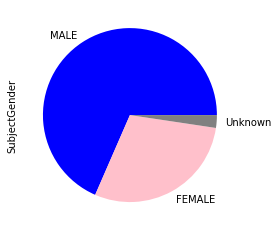

In [62]:
df['SubjectGender'] = df['SubjectGender'].fillna('Unknown')
df['SubjectGender'].value_counts().plot.pie(colors=['blue', 'pink', 'gray'])

This pie chart compares the percentage of women and men located in the city of New Orleans.

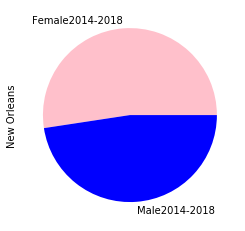

In [63]:
NewOrleansGenders = gender_df[['Female2014-2018', 'Male2014-2018']]
display(NewOrleansGenders.loc['New Orleans'].plot.pie(y='Gender in New Orleans, 2014-2018', colors=['pink', 'blue']))

Although we can already see that males are disproportionately stopped compared to females (since if it were proportional there would be just as many, if not slightly more, females stopped by police as males), we would like to transform the data further to ensure we are comparing the two datasets fairly.

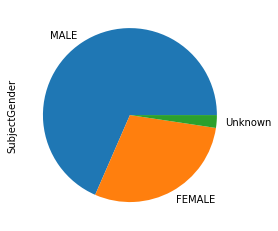

In [54]:
#REMOVE BEFORE TURNING IN: do more complicated analysis here??

In [63]:
numRows = len(df.index)
actionCategories = []
temp = ""
semiBool = True
for i in actionsLst:
    if (type(i) is str):
        semiBool = True
        for j in i:
            
            if (semiBool == True):
                if(j != ":"):
                    temp += j
                else:
                    semiBool = False
                    if (temp not in actionCategories):
                        actionCategories.append(temp)
                    temp = ""
            elif (j == ";"):
                semiBool = True
                
temp1 = []

for i in range(numRows):
    temp1.append(0)   
        
df['StopResults'] = temp1
df['SubjectType'] = temp1
df['SearchOccurred'] = temp1
df['SearchTypes'] = temp1
df['LegalBasises'] = temp1
df['EvidenceSeized'] = temp1
df['EvidenceTypes'] = temp1
df['ConsentToSearch'] = temp1
df['ExitVehicle'] = temp1
df['SearchTypePatDown'] = temp1
df['ConsentFormCompleted'] = temp1
df['StripBodyCavitySearch'] = temp1
df['ConsentGiven'] = temp1
df['TypeOfSearch'] = temp1
df['TypeOfSearchSupervisorApproval'] = temp1
df.head()

for index, row in df.iterrows():
    if (type(row["ActionsTaken"]) is str):
        lilBool = False
        info = ""
        category = ""
        for j in (range(len(row["ActionsTaken"]) - 1)):
            if (row["ActionsTaken"][j] == ":"):
                lilBool = True
            elif (row["ActionsTaken"][j] == ";"):
                lilBool = False
                if (temp == 'Stop Results'):
                    row['StopResults'] = info
                elif (temp == 'Subject Type'):
                    row['SubjectType'] = info
                elif (temp == 'Search Occurred'):
                    row['SearchOccured'] = info
                elif (temp == 'Search Types'):
                    row['SearchTypes'] = info
                elif (temp == 'Legal Basises'):
                    row['LegalBasises'] = info
                elif (temp == 'Evidence Seized'):
                    row['EvidenceSeized'] = info
                elif (temp == 'Evidence Types'):
                    row['EvidenceTypes'] = info
                elif (temp == 'Consent To Search'):
                    row['ConsentToSearch'] = info
                elif (temp == 'Exit Vehicle'):
                    row['ExitVehicle'] = info
                elif (temp == 'Search Type Pat Down'):
                    row['SearchTypePatDown'] = info
                elif (temp == 'Consent Form Completed'):
                    row['ConsentFormCompleted'] = info
                elif (temp == 'StripBody Cavity Search'):
                    row['StripBodyCavitySearch'] = info
                elif (temp == 'Consent Given'):
                    row['ConsentGiven'] = info
                elif (temp == 'Type of Search'):
                    row['TypeOfSearch'] = info
                elif (temp == 'Type of Search Supervisor Approval'):
                    row['TypeOfSearchSupervisorApproval'] = info
                temp = ""
                info = ""
            elif (j == (len(row["ActionsTaken"]) - 1)):
                if (temp == 'Stop Results'):
                    row['StopResults'] = info
                elif (temp == 'Subject Type'):
                    row['SubjectType'] = info
                elif (temp == 'Search Occurred'):
                    row['SearchOccured'] = info
                elif (temp == 'Search Types'):
                    row['SearchTypes'] = info
                elif (temp == 'Legal Basises'):
                    row['LegalBasises'] = info
                elif (temp == 'Evidence Seized'):
                    row['EvidenceSeized'] = info
                elif (temp == 'Evidence Types'):
                    row['EvidenceTypes'] = info
                elif (temp == 'Consent To Search'):
                    row['ConsentToSearch'] = info
                elif (temp == 'Exit Vehicle'):
                    row['ExitVehicle'] = info
                elif (temp == 'Search Type Pat Down'):
                    row['SearchTypePatDown'] = info
                elif (temp == 'Consent Form Completed'):
                    row['ConsentFormCompleted'] = info
                elif (temp == 'StripBody Cavity Search'):
                    row['StripBodyCavitySearch'] = info
                elif (temp == 'Consent Given'):
                    row['ConsentGiven'] = info
                elif (temp == 'Type of Search'):
                    row['TypeOfSearch'] = info
                elif (temp == 'Type of Search Supervisor Approval'):
                    row['TypeOfSearchSupervisorApproval'] = info
                temp = ""
                info = ""
            elif ((lilBool == True) and (row["ActionsTaken"][j] != ":")):
                info += row["ActionsTaken"][j]
                 
            elif ((lilBool == False) and (row["ActionsTaken"][j] != ";")):
                temp += str(j)
df.head()
    

KeyboardInterrupt: 

In [ ]:
actionCategories